## Data analysis of patients data

Here we analyze patients data collected by Olivier

@ Olivier (main code and data), 

@ Liubov  (additional code)

This is the open-source part of the MonsterMizer and additional part by CorrelAid.
You can find open-sourced data from github: MonsterMizer Open Data.
You can find a first analysis of some of the data and the corresponding open-sourced code here: first experiment.
For any other information, feel free to email olivier.mirat.om@gmail.com or liubov.tupikina@cri-paris.org

Inspiration for notebooks from Bastian https://exploratory.openhumans.org/notebook/10/ and Olivier.

## Creation of the dataframe where everything will be stored

In order to run notebooks please substitute the **file** name "C:/Users/lyubo/Documents/DATA_networks/patients_data" to ".." where your data file is located.

In [1]:
import pickle
import numpy as np
import csv
import datetime
import pandas as pd
import os, os.path
import re

# Creation of the dataframe where everything will be stored
i = pd.date_range('2015-11-19', periods=1206, freq='1D')
sLength = len(i)
empty = pd.Series(np.zeros(sLength)).values
d = {'basisPeakSteps': empty, 'steps': empty, 'denivelation': empty, 'kneePain': empty, 'handsAndFingerPain': empty, 'foreheadAndEyesPain': empty, 'forearmElbowPain': empty, 'aroundEyesPain': empty, 'shoulderNeckPain': empty, 'painthreshold': np.full((sLength),3.4), 'whatPulseKeysC1': empty, 'whatPulseClicksC1': empty, 'manicTimeC1': empty, 'whatPulseKeysC2': empty, 'whatPulseClicksC2': empty, 'manicTimeC2': empty, 'whatPulseKeysC3': empty, 'whatPulseClicksC3': empty, 'manicTimeC3': empty, 'whatPulseKeysT': empty, 'whatPulseClicksT': empty, 'whatPulseT': empty, 'manicTimeT': empty, 'walk': empty, 'roadBike': empty, 'mountainBike': empty, 'swimming': empty, 'surfing': empty, 'climbing': empty, 'viaFerrata': empty, 'alpiSki': empty, 'downSki': empty, 'eyeRelatedActivities': empty, }
data = pd.DataFrame(data=d, index=i)


#filename = "C:/Users/lyubo/Documents/DATA_networks/patients_data/MonsterMizer-master/MonsterMizerOpenData"
# Storing BasisPeak data in dataframe
if False: # This step takes a long time, put to False if you want to skip it, and to True otherwise
  filename = 'C:/Users/lyubo/Documents/DATA_networks/patients_data/MonsterMizer-master/MonsterMizerOpenData/bodymetrics.csv'
  with open(filename, newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    count = 0
    for row in spamreader:
      count=count+1
      if (count>2 and len(row)):
        date  = row[0][0:10]
        data.loc[date,'basisPeakSteps'] = data.loc[date,'basisPeakSteps'] + int(row[5])
        if count % 10000 == 0:
          print(count,'lines done out of the 532 330 needed for the basis peak')


In [7]:
data.head(10)

,basisPeakSteps,steps,denivelation,kneePain,handsAndFingerPain,foreheadAndEyesPain,forearmElbowPain,aroundEyesPain,shoulderNeckPain,painthreshold,...,walk,roadBike,mountainBike,swimming,surfing,climbing,viaFerrata,alpiSki,downSki,eyeRelatedActivities
2015-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Storing fitbit data in dataframe


Data preprocessing...

In [7]:
filecore = "C:/Users/lyubo/Documents/DATA_networks/patients_data" #  filename = 'C:/Users/lyubo/Documents/DATA_networks/patients_data/MonsterMizer-master/MonsterMizerOpenData/bodymetrics.csv'


# Storing fitbit data in dataframe
directory = os.fsencode(filecore +'/MonsterMizer-master/MonsterMizerOpenData/Participant1PublicOM/dailyFitBitPerMonth/')

for file in os.listdir(directory):
  name = os.fsdecode(file)
  if name.endswith(".csv"): 
    filename = filecore+'/MonsterMizer-master/MonsterMizerOpenData/Participant1PublicOM/dailyFitBitPerMonth/'+name
    with open(filename, newline='') as csvfile:
      spamreader = csv.reader(csvfile)
      count = 0
      for row in spamreader:
        count=count+1
        if (count>2 and len(row)):
          day   = row[0][0:2]
          month = row[0][3:5]
          year  = row[0][6:10]
          date  = year+'-'+month+'-'+day
          data.loc[date,'steps']        = int(row[2].replace(',',''))
          data.loc[date,'denivelation'] = int(row[4])


## Storing pain intensities in dataframe


In [12]:
filename = 'C:/Users/lyubo/Documents/DATA_networks/patients_data/MonsterMizer-master/MonsterMizerOpenData/Participant1PublicOM/pain.csv'
curYear  = ''
curMonth = ''
curDay   = ''
with open(filename, newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count = 0
  for row in spamreader:
    count=count+1
    if (count>2 and len(row)):
      if len(row[0]):
        curYear  = row[0]
      if len(row[1]):
        curMonth = row[1]
        if len(curMonth) == 1:
          curMonth = '0'+curMonth
      if len(row[2]):
        curDay   = row[2]
        if len(curDay) == 1:
          curDay = '0'+curDay
      date = curYear+'-'+curMonth+'-'+curDay
      dict = {'Knees' : 'kneePain',
              'Hands And Fingers' : 'handsAndFingerPain',
              'Forehead and Eyes' : 'foreheadAndEyesPain',
              'Forearm close to elbow' : 'forearmElbowPain',
              'Eyes (or around them)' : 'aroundEyesPain',
              'Shoulder Neck' : 'shoulderNeckPain'}
      if (row[3] in dict):
        data.loc[date,dict[row[3]]] = float(row[5])
        


# Nonzero elements analysis

In [26]:
# number of nonzero elements in dataframe
print('number of nonzero elements in dataframe')
np.count_nonzero(data)

print('shape')
print(data.shape)

# find first columns with nonzero values
first_nonzero_colnames = (data > 0).idxmax(axis=1, skipna=True)
data.lookup(first_nonzero_colnames.index, first_nonzero_colnames.values)


data[data!=0].cumsum(axis=1).min(axis=1)

number of nonzero elements in dataframe
shape
(1206, 33)


2015-11-19    3.4
2015-11-20    3.4
2015-11-21    3.4
2015-11-22    3.4
2015-11-23    3.4
             ... 
2019-03-04    3.4
2019-03-05    3.4
2019-03-06    3.4
2019-03-07    3.4
2019-03-08    3.4
Freq: D, Length: 1206, dtype: float64

# Plotting data

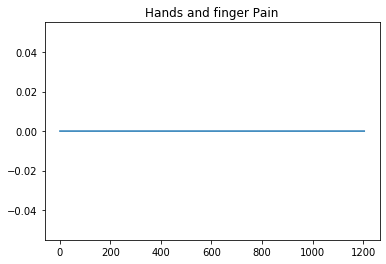

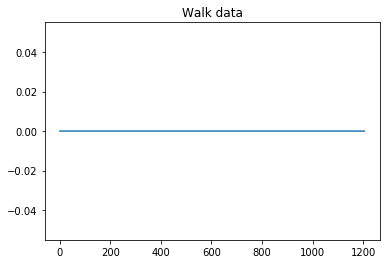

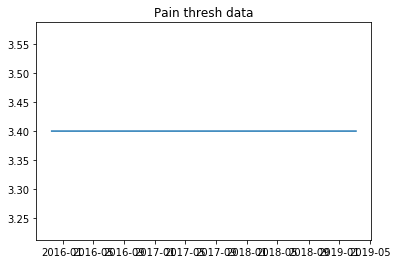

number of nonzero elements in the matrix


In [27]:
from matplotlib import pyplot as plt

data_pain = data.handsAndFingerPain.values#[data.handsAndFingerPain]
data_pain

plt.plot(data_pain)
plt.title('Hands and finger Pain')
plt.show()

data_walk = data.walk.values#[data.handsAndFingerPain]
data_walk

plt.plot(data_walk)
plt.title('Walk data')
plt.show()

data_painthr = data.painthreshold

plt.plot(data_painthr)
plt.title('Pain thresh data')
plt.show()

print('number of nonzero elements in the matrix')

# Storing whatPulse data in dataFrame


In [13]:

        
for num in ['1','2','3']:
  nbFiles = len([name for name in os.listdir(filecore+'/MonsterMizer-master/MonsterMizerOpenData/Participant1PublicOM/computerUsage/computer'+num+'/whatPulse/') if os.path.isfile(os.path.join('data/computerUsage/computer'+num+'/whatPulse/', name))])
  for i in range(1,nbFiles+1):
    filename = filecore + '/MonsterMizer-master/MonsterMizerOpenData/Participant1PublicOM/computerUsage/computer'+num+'/whatPulse/whatpulse-input-history'+str(i)+'.csv'
    with open(filename, newline='') as csvfile:
      spamreader = csv.reader(csvfile)
      count = 0
      for row in spamreader:
        count=count+1
        if (count>1 and len(row)):
          date  = row[0][0:10]
          data.loc[date,'whatPulseKeysC'+num] = int(row[1])
          data.loc[date,'whatPulseClicksC'+num] = int(row[2])
data['whatPulseKeysT'] = data['whatPulseKeysC1'] + data['whatPulseKeysC2'] + data['whatPulseKeysC3']
data['whatPulseClicksT'] = data['whatPulseClicksC1'] + data['whatPulseClicksC2'] + data['whatPulseClicksC3']
data['whatPulseT'] = data['whatPulseKeysT'] + data['whatPulseClicksT']


In [30]:
data.head()

,basisPeakSteps,steps,denivelation,kneePain,handsAndFingerPain,foreheadAndEyesPain,forearmElbowPain,aroundEyesPain,shoulderNeckPain,painthreshold,...,walk,roadBike,mountainBike,swimming,surfing,climbing,viaFerrata,alpiSki,downSki,eyeRelatedActivities
2015-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-11-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Storing Manic Time data in dataFrame


In [14]:

for num in ['1','2','3']:
  filename = filecore + '/MonsterMizer-master/MonsterMizerOpenData/Participant1PublicOM/computerUsage/computer'+num+'/manicTime/manicTime.csv'
  with open(filename, newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    count = 0
    for row in spamreader:
      count=count+1
      if (count>1 and len(row)):
        if row[0][0:4] == "Acti":
          if num == '1':
            day   = row[1][0:2]
            month = row[1][3:5]
            year  = row[1][6:10]
          else:
            delimit = [m.start() for m in re.finditer('/', row[1])]
            month = row[1][0:delimit[0]]
            day   = row[1][delimit[0]+1:delimit[1]]
            if len(month)==1:
              month = '0' + month
            if len(day)==1:
              day = '0' + day
            year  = row[1][delimit[1]+1:delimit[1]+5]
          date  = year+'-'+month+'-'+day
          hours = int(row[3][0:1]) * 60 + int(row[3][2:4])
          data.loc[date,'manicTimeC'+num] = data.loc[date,'manicTimeC'+num] + hours
data['manicTimeT'] = data['manicTimeC1'] + data['manicTimeC2'] + data['manicTimeC3']



KeyError: 'the label [2015-11-22] is not in the [index]'

## Storing Sport data in dataframe

In [11]:

filename = filecore +'/MonsterMizer-master/MonsterMizerOpenData/Participant1PublicOM/sport.csv'
curYear  = ''
curMonth = ''
curDay   = ''
with open(filename, newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count = 0
  for row in spamreader:
    count=count+1
    if (count>1 and len(row)):
      if len(row[0]):
        curYear  = row[0]
      if len(row[1]):
        curMonth = row[1]
        if len(curMonth) == 1:
          curMonth = '0'+curMonth
      if len(row[2]):
        curDay   = row[2]
        if len(curDay) == 1:
          curDay = '0'+curDay
      date = curYear+'-'+curMonth+'-'+curDay
      dict = {'Walk' : 'walk',
              'Road Bike' : 'roadBike',
              'Mt Bike' : 'mountainBike',
              'Swimming' : 'swimming',
              'Surfing' : 'surfing',
              'Climbing' : 'climbing',
              'Via Ferrata' : 'viaFerrata',
              'Alpi Ski' : 'alpiSki',
              'Down Ski' : 'downSki'}
      if (row[3] in dict):
        data.loc[date,dict[row[3]]] = 1

# Storing Eye related activity hours in dataframe
filename = filecore + '/MonsterMizer-master/MonsterMizerOpenData/Participant1PublicOM/eyeRelatedActivities.csv'
curYear  = ''
curMonth = ''
curDay   = ''
with open(filename, newline='') as csvfile:
  spamreader = csv.reader(csvfile)
  count = 0
  for row in spamreader:
    count=count+1
    if (count>2 and len(row)):
      if len(row[0]):
        curYear  = row[0]
      if len(row[1]):
        curMonth = row[1]
        if len(curMonth) == 1:
          curMonth = '0'+curMonth
      if len(row[2]):
        curDay   = row[2]
        if len(curDay) == 1:
          curDay = '0'+curDay
      date = curYear+'-'+curMonth+'-'+curDay
      tot = 0
      if len(row[3]):
        tot = tot + int(row[3])
      if len(row[4]):
        tot = tot + int(row[4])
      if len(row[5]):
        tot = tot + int(row[5])
      if len(row[6]):
        tot = tot + int(row[6])
      data.loc[date,'eyeRelatedActivities'] = tot

# Saving the dataframe in a txt
output = open('data.txt', 'wb')
pickle.dump(data, output)
output.close()